# I. Loading and understanding data

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('car_evaluation.csv')

In [55]:
df1 = pd.read_csv('car_evaluation.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   buying      1727 non-null   object
 1   mantenance  1727 non-null   object
 2   doors       1727 non-null   object
 3   persons     1727 non-null   object
 4   lug_boot    1727 non-null   object
 5   safety      1727 non-null   object
 6   decision    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [3]:
df.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [56]:
column_names = ['buying','mantenance', 'doors', 'persons', 'lug_boot', 'safety', 'decision']
df1.columns = column_names

In [5]:
column_names = ['buying','mantenance', 'doors', 'persons', 'lug_boot', 'safety', 'decision']
df.columns = column_names

In [6]:
df.describe()

,buying,mantenance,doors,persons,lug_boot,safety,decision
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


Check missing value

In [7]:
# Check missing value
df[df.isna()].count()

buying        0
mantenance    0
doors         0
persons       0
lug_boot      0
safety        0
decision      0
dtype: int64

Distribution between classes

In [18]:
decision_unique_value = df['decision'].value_counts()
df_decision = pd.DataFrame({'Class':decision_unique_value.index,'Count':decision_unique_value.values })
df_decision

,Class,Count
0,unacc,1209
1,acc,384
2,good,69
3,vgood,65


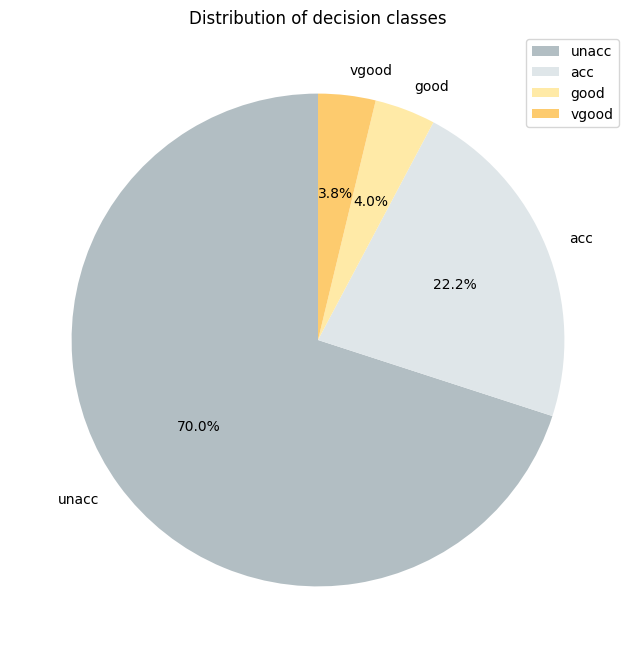

In [44]:
plt.figure(figsize=(8,8))
plt.pie(df_decision['Count'], startangle=90, autopct='%1.1f%%', colors=['#b2bec3','#dfe6e9','#ffeaa7','#fdcb6e'], labels = df_decision['Class'])
plt.legend(df_decision['Class'])
plt.title('Distribution of decision classes')
plt.show()

From the chart, we can see that:
* unacceptable class is dominant with 70%
* acceptable class accounts for 22%
* mere of good and very good class.

# II. Preprocessing data

Transform nominal and ordinal data from buying, mantenance, lug_boot, safety and decision

In [42]:
df.dtypes

buying        object
mantenance    object
doors         object
persons       object
lug_boot      object
safety        object
decision      object
dtype: object

In [47]:
# Preprocessing class
class Preprocessing:
    def __init__(self, data):
        self.data = data

    # Create a function to transform ordinal data
    def transform_ordinal_data(self, column):
        original_values = self.data[column].unique()
        new = 0
        for original in original_values:
            self.data[column] = self.data[column].replace(original, new)
            new += 1
        return self.data[column]

    def transform_nominal_data(self, column):
        original_values = self.data[column].unique()      
        for original in original_values:
            if len(original) <=2:
                self.data[column] = self.data[column].replace(original, int(original))
            else:
                self.data[column] = self.data[column].replace(original, int(original_values[len(original_values)-2])+1)
        return self.data[column]

* buying, mantenance
vhigh: 0
high: 1,
med: 2,
low: 3

* doors
2: 2,
3: 3,
4: 4
5more: 5

* persons
2: 2,
4: 4
more: 5

* lug_boot
small: 0
med: 1,
big: 2

* safety
med: 0,
high: 1,
low: 2

* decision
unacc: 0
acc: 1
vgood: 2
good: 3



In [49]:
preprocessing = Preprocessing(df)
df['buying'] = preprocessing.transform_ordinal_data('buying')
df['mantenance'] = preprocessing.transform_ordinal_data('mantenance')
df['doors'] = preprocessing.transform_nominal_data('doors')
df['persons'] = preprocessing.transform_nominal_data('persons')
df['lug_boot'] = preprocessing.transform_ordinal_data('lug_boot')
df['safety'] = preprocessing.transform_ordinal_data('safety')
df['decision'] = preprocessing.transform_ordinal_data('decision')

In [48]:
df.head(10)

,buying,mantenance,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [50]:
df.head(10)

,buying,mantenance,doors,persons,lug_boot,safety,decision
0,0,0,2,2,0,0,0
1,0,0,2,2,0,1,0
2,0,0,2,2,1,2,0
3,0,0,2,2,1,0,0
4,0,0,2,2,1,1,0
5,0,0,2,2,2,2,0
6,0,0,2,2,2,0,0
7,0,0,2,2,2,1,0
8,0,0,2,4,0,2,0
9,0,0,2,4,0,0,0


# II. Exploratory data analysis

## 1) Buying vs decision

Text(0.5, 1.0, 'Buying vs decision')

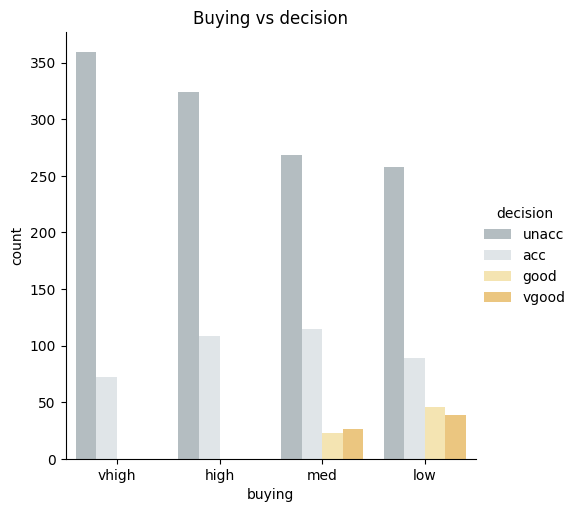

In [123]:
sns.catplot(df1, x='buying', hue='decision', hue_order=['unacc','acc', 'good', 'vgood'], kind='count', palette=['#b2bec3','#dfe6e9','#ffeaa7','#fdcb6e'])
plt.title("Buying vs decision")

As can be seen from the chart, there are no good and very good decisions in very high and high buying (price).

## 2) Mantenance vs decision

Text(0.5, 1.0, 'Mantenance vs decision')

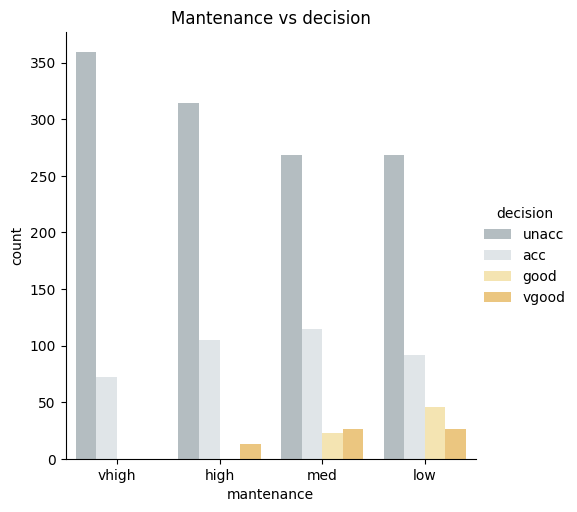

In [125]:
sns.catplot(df1, x='mantenance', hue='decision', hue_order=['unacc','acc', 'good', 'vgood'], kind='count', palette=['#b2bec3','#dfe6e9','#ffeaa7','#fdcb6e'])
plt.title("Mantenance vs decision")

There is no good and very good decision in very high mantenance
There is no good decision in high mantenance

## 3) Doors vs decision

Text(0.5, 1.0, 'Doors vs decision')

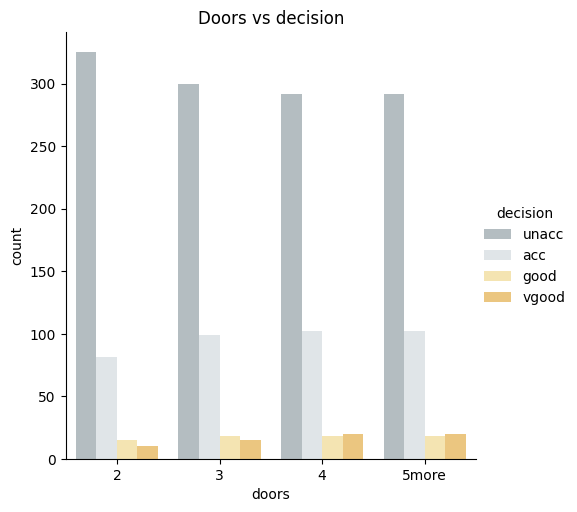

In [127]:
sns.catplot(df1, x='doors', hue='decision', hue_order=['unacc','acc', 'good', 'vgood'], kind='count', palette=['#b2bec3','#dfe6e9','#ffeaa7','#fdcb6e'])
plt.title("Doors vs decision")

The distribution of decision throughout the doors are quite similar. It seems that doors is not a good feature to classify

## 4) Persons vs decision 

Text(0.5, 1.0, 'Persons vs decision')

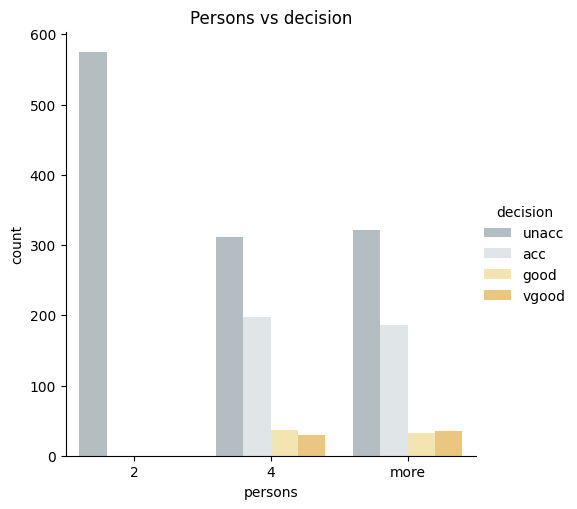

In [137]:
sns.catplot(df1, x='persons', hue='decision', hue_order=['unacc','acc', 'good', 'vgood'], kind='count', palette=['#b2bec3','#dfe6e9','#ffeaa7','#fdcb6e'])
plt.title("Persons vs decision")

There are only unacceptable decisions for 2 persons
The rest kind of persons are quite similar

## 5) Lug_boot vs decision

Text(0.5, 1.0, 'Lug_boot vs decision')

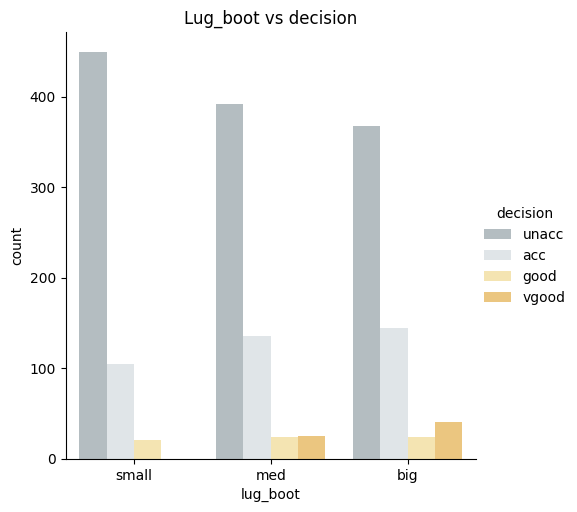

In [130]:
sns.catplot(df1, x='lug_boot', hue='decision', hue_order=['unacc','acc', 'good', 'vgood'], kind='count', palette=['#b2bec3','#dfe6e9','#ffeaa7','#fdcb6e'])
plt.title("Lug_boot vs decision")

There is no very good decision with small lug_boot

## 6) Safety vs decision

Text(0.5, 1.0, 'Safety vs decision')

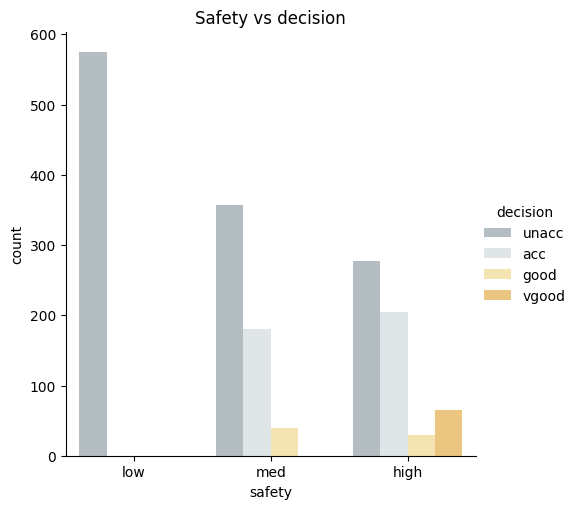

In [136]:
sns.catplot(df1, x='safety', hue='decision', order=['low','med','high'], hue_order=['unacc','acc', 'good', 'vgood'], kind='count', palette=['#b2bec3','#dfe6e9','#ffeaa7','#fdcb6e'])
plt.title("Safety vs decision")

There are only unacceptable decisions with low safety
There is no very good decisions with medium safety

Buying (price), mantenance, persons, lug_boot and safety are interesting for classifying decisions.

# III. Building KNN from scratch